In [1]:
from platform import python_version

In [2]:
print(python_version())

3.7.6


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import os

In [4]:
DATA_PATH = r'D:\MADE_homeworks\ML_prod\homework1\ml_project\ml_project\data\raw'
DATA_FILE = 'heart.csv'

data = pd.read_csv(os.path.join(DATA_PATH, DATA_FILE))

In [5]:
data.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
1%,35.000,0.000,0.000,100.000,149.000,0.000,0.000,95.020,0.000,0.000,0.000,0.000,1.000,0.000
5%,39.100,0.000,0.000,108.000,175.000,0.000,0.000,108.100,0.000,0.000,0.000,0.000,1.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
95%,68.000,1.000,3.000,160.000,326.900,1.000,1.000,181.900,1.000,3.400,2.000,3.000,3.000,1.000


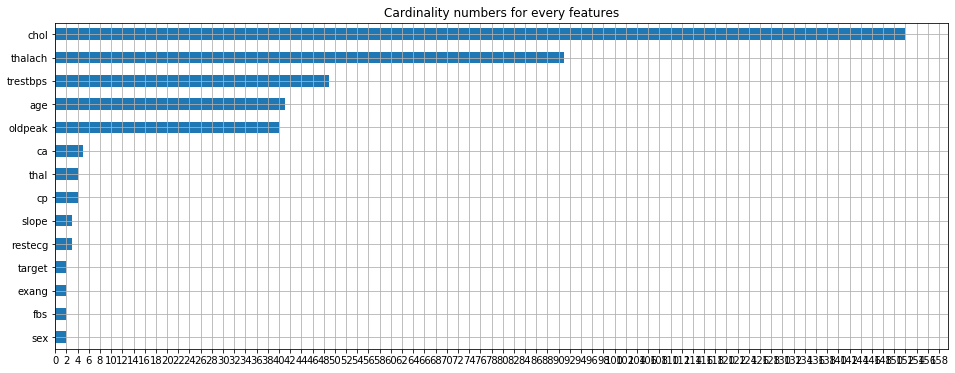

In [6]:
# get cardinality of all features
plt.figure(figsize=(16, 6))
data.nunique().sort_values().plot(kind='barh');
plt.title("Cardinality numbers for every features")
plt.xticks(np.arange(0, 160, 2))
plt.grid(True)
plt.show()

In [7]:
features = [i for i in data.columns if i != 'target']
low_cardinality_features = data.nunique().loc[data.nunique() < 20].index.tolist()
high_cardinality_features = [i for i in data.columns if i not in low_cardinality_features and i != 'target']

In [9]:
print(low_cardinality_features)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [10]:
print(high_cardinality_features)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Let's show difference between target=0 and target=1 by most features

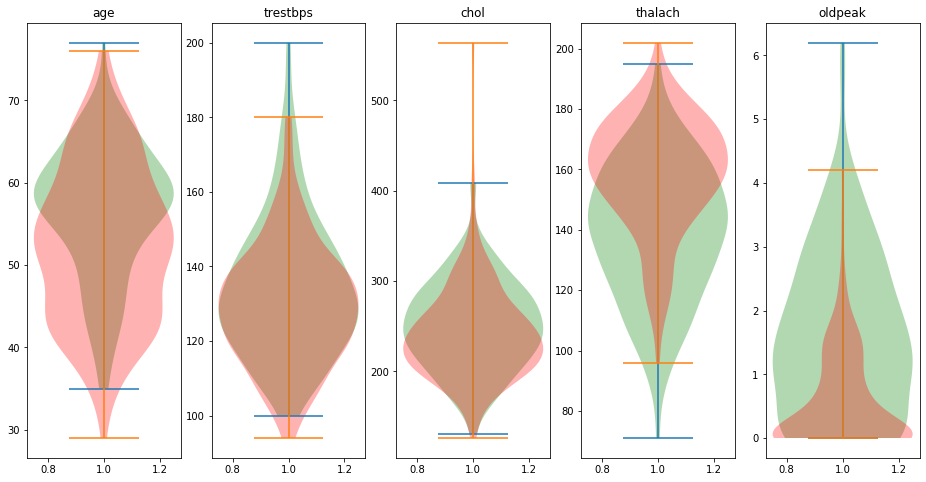

In [8]:
# violin plots for all "continuous" variable
ncols = 5
nrows = max(len(high_cardinality_features) // ncols, 1)


fig, ax = plt.subplots(ncols=ncols, 
                      nrows=nrows, figsize=(16,8))


for feature_num in range(len(high_cardinality_features)):

    if nrows > 1:
        ax_num_slice = (feature_num // ncols, feature_num % ncols)
    else:
        ax_num_slice = feature_num % ncols
    
    
    to_plot = data.loc[data.target == 0][high_cardinality_features[feature_num]].values
    violin_plot = ax.__getitem__(ax_num_slice).violinplot(to_plot);
    violin_plot['bodies'][0].set_facecolor('green')
    
    to_plot = data.loc[data.target == 1][high_cardinality_features[feature_num]].values
    violin_plot = ax.__getitem__(ax_num_slice).violinplot(to_plot);
    violin_plot['bodies'][0].set_facecolor('red')
    
    # plt.legend()
    ax.__getitem__(ax_num_slice).set_title(high_cardinality_features[feature_num])
    